# **Sentiment Analysis on IMDB Movie Reviews**


*For this project, we will be predicting the sentiment of movie reviews whether they are positive or negative. We will be using the IMDB movie reviews dataset that is conveniently available that is built in into the Keras package. We will also be using LSTM's to read the reviews and make a prediction.*

**Importing the Required Libraries**

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM,Embedding,Dense
from keras.models import Sequential

import pandas as pd
import matplotlib.pyplot as plt

**Loading the Data from Keras**

In [ ]:
(X_train,y_train),(X_test,y_test)=imdb.load_data('/tmp/imdb.npz',num_words=None,skip_top=0,maxlen=None,start_char=1,oov_char=2,index_from=3) 

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

**Data Shape**

In [ ]:
print('X_train has a shape of '+str(X_train.shape))
print('y_train has a shape of '+str(y_train.shape))
print('X_test has a shape of '+str(X_test.shape))
print('y_test has a shape of '+str(y_test.shape))

X_train has a shape of (25000,)
y_train has a shape of (25000,)
X_test has a shape of (25000,)
y_test has a shape of (25000,)


*This means that our training and testing dataset are both of equal shape and they both have 25000 reviews which is a decent size dataset.*

**Looking at the Data**

In [ ]:
for i in range(10):
    print(X_train[i][:15])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4]
[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61]
[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13]
[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401]
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 43222, 32, 85]
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940]
[1, 4, 14906, 716, 4, 65, 7, 4, 689, 4367, 6308, 2343, 4804, 28674, 84206]
[1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664, 14, 9, 1713, 81]
[1, 14, 20, 47, 111, 439, 3445, 19, 12, 15, 166, 12, 216, 125, 40]


*As we can see all of the reviews starts with the number 1. This is because the number 1 symbolizes the start of the review as we decided earlier.*

**Word Index**

In [ ]:
idx=imdb.get_word_index()
print('There are '+str(len(idx))+' words in the dictionary.')

1654784/1641221 [==============================] - 0s 0us/step
There are 88584 words in the dictionary.


**Index Samples**

In [ ]:
{k:idx[k] for k in list(idx)[:10]}

{'fawn': 34701,
 'hanging': 2345,
 'nunnery': 52007,
 'sonja': 16816,
 'spiders': 16115,
 'trawling': 52008,
 'tsukino': 52006,
 'vani': 63951,
 'woods': 1408,
 'woody': 2289}

**Swap Keys With Index and Move 3 Places**

*Currently, our dictionary has the words as keys. We will swap them out so that we can convert our numeric data into something human readable* 

In [ ]:
rev_idx={v + 3:k for k,v in idx.items()}
{k:rev_idx[k] for k in list(rev_idx)[:10]}

{1411: 'woods',
 2292: 'woody',
 2348: 'hanging',
 16118: 'spiders',
 16819: 'sonja',
 34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 52011: 'trawling',
 63954: 'vani'}

*In addition, we also have to add our padding character, starting character, special characters*

In [ ]:
rev_idx[0]='padding_char'
rev_idx[1]='start_char'
rev_idx[2]='oov_char'
rev_idx[3]='unk_char'

**Converting Data Into Human Readable Text**

*Example - 1*

In [ ]:
' '.join([rev_idx[word] for word in X_train[0]])

"start_char this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and

*Example - 2*

In [ ]:
' '.join([rev_idx[word] for word in X_train[1]])

"start_char big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back the

*Example - 3*

In [ ]:
' '.join([rev_idx[word] for word in X_train[2]])

"start_char this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had earnt working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how embarrasing this is to watch save yourself an hour a bit of your life"

*As you can see in the texts above, they all started with "start_char". In the datasets, we can observe that there are no punctuations and all the text is in lowercase. This was done in order to reduce the size of the dictionary.*

**Observation Sizes**

In [ ]:
print('Example - 1 has a length of '+str(len(X_train[0]))+' words.')
print('Example - 2 has a length of '+str(len(X_train[1]))+' words.')
print('Example - 3 has a length of '+str(len(X_train[2]))+' words.')

Example - 1 has a length of 218 words.
Example - 2 has a length of 189 words.
Example - 3 has a length of 141 words.


*Text is considered unstructured data so, each observation can be of varying sizes. We have to make each one of the same size because the model only accepts data that is of a specific size.*

**Padding Sequences**

*To address the concern mentioned above, we can pad the data for it to increase its size or we can also reduce its size by truncating it in the beggining or at the end. For this exercise we will use 100 words and cut the beginning.*

In [ ]:
maxlen=100
X_train_pad=pad_sequences(X_train,maxlen=maxlen)
X_test_pad=pad_sequences(X_test,maxlen=maxlen)

**Data Shapes**

In [ ]:
print('X_train has a shape of '+str(X_train.shape))
print('X_train_pad has a shape of '+str(X_train_pad.shape))

X_train has a shape of (25000,)
X_train_pad has a shape of (25000, 100)


*As we can see above X_train_pad now has 100 columns because of our padding. The number of columns are now in uniform.*

**Observing the Difference**

*Normal Data*

In [ ]:
' '.join([rev_idx[word] for word in X_train[0]])

"start_char this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and

*Padded Data*

In [ ]:
' '.join([rev_idx[word] for word in X_train_pad[0]])

"cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"

*As we can see above the length of the padded data is shorter by cutting the beginning out.*

**Get Max Features**

*We need to get the max features for the shape of the embedding.*

In [ ]:
max_features=max([max(x) for x in X_train_pad]+[max(x) for x in X_test_pad])+1
print(max_features)

88587


**Create Model**

In [ ]:
model=Sequential()
model.add(Embedding(max_features,128))
model.add(LSTM(64,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Initial Model**

In [ ]:
model.fit(X_train_pad,y_train,batch_size=32,epochs=3)

Epoch 1/3
782/782 [==============================] - 371s 444ms/step - loss: 0.4827 - accuracy: 0.7493
Epoch 2/3
782/782 [==============================] - 346s 442ms/step - loss: 0.1832 - accuracy: 0.9328
Epoch 3/3
782/782 [==============================] - 347s 444ms/step - loss: 0.0967 - accuracy: 0.9663


**Initial Model Accuracy**

In [ ]:
score,acc=model.evaluate(X_test_pad, y_test)
print('Test score:',score)
print('Test accuracy:',acc)

782/782 [==============================] - 20s 24ms/step - loss: 0.4943 - accuracy: 0.8349
Test score: 0.4942680597305298
Test accuracy: 0.8349199891090393


*As you can see our model did okay, it is pretty decent. However, we want to further improve it.*

**Improving the Model**

*To further improve the model we are going to try a variety of techniques but first we have to look closer into the data.*

**Length of Reviews**

In [ ]:
lengths=[]
for i in range(len(X_train)):
    lengths.append(len(X_train[i]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


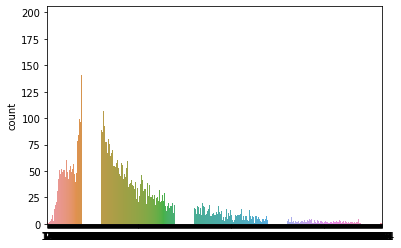

In [ ]:
import seaborn as sns
sns.countplot(lengths)

*As we can see, there are a decent amound of reviews that pass 100. So, we will extend the padding to 125 since the dataset is not that big anyway.*

**Increasing the Length of the Reviews**

In [ ]:
X_train_pad_more=pad_sequences(X_train,maxlen=175)
X_test_pad_more=pad_sequences(X_test,maxlen=175)

In [ ]:
X_train_pad_more.shape

(25000, 175)

**Word Frequency**

*Another thing that we want to address is the frequency of the words we have used. For sure some words just add noise to our data.*

In [ ]:
flat_list=[]
for sublist in X_train:
    for item in sublist:
        flat_list.append(item)

In [ ]:
from collections import Counter
word_freq=Counter(flat_list)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100.0)

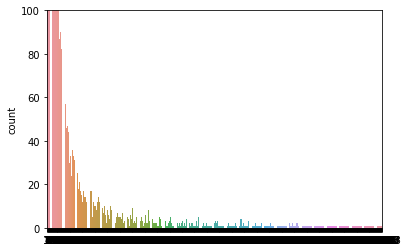

In [ ]:
lm=sns.countplot(list(word_freq.values()))
lm.set_ylim(0,100)

**Remove Words that are Low in Frequency**

In [ ]:
X_train_pad_more[X_train_pad_more>5000]=3
X_test_pad_more[X_test_pad_more>5000]=3

In [ ]:
print('Words Removed: '+str(pd.Series(sum(X_train_pad_more==3)/len(X_train_pad_more)).mean()))

Words Removed: 0.07849622857142853


*We only removed about 8 percent of the words who are most likely just noise.*

*Sample - 1*

In [ ]:
' '.join([rev_idx[word] for word in X_train_pad_more[0]])

"scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for unk_char and would recommend it to everyone to watch and the fly unk_char was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also unk_char to the two little unk_char that played the unk_char of norman and paul they were just brilliant children are often left out of the unk_char list i think because the stars that play them all grown up are such a big unk_char for the whole film but these children are amazing and should be unk_char for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was unk_char with us all"

*As you can see above, there are more "unk_char" because we replaced the words that are not very frequent into them. We did this to reduce the noise in the dataset.*

**Final Model**

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
model=Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(64,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train_pad_more,y_train,batch_size=32,epochs=3)

Epoch 1/3
782/782 [==============================] - 548s 697ms/step - loss: 0.4929 - accuracy: 0.7502
Epoch 2/3
782/782 [==============================] - 545s 697ms/step - loss: 0.2689 - accuracy: 0.8919
Epoch 3/3
782/782 [==============================] - 542s 693ms/step - loss: 0.2168 - accuracy: 0.9149


**Final Model Accuracy**

In [ ]:
score,acc=model.evaluate(X_test_pad_more,y_test)
print('Test score:',score)
print('Test accuracy:',acc)

782/782 [==============================] - 34s 43ms/step - loss: 0.3326 - accuracy: 0.8688
Test score: 0.33256930112838745
Test accuracy: 0.8688399791717529


**Save Model**

In [ ]:
model.save('IMDB Movie Review Model.h5')

*The initial model was able to get an accuracy of 83.49%, because of the improvements we have made we were able to increase it by 3.39% to an accuracy of 86.88%*